<a href="https://colab.research.google.com/github/reggy0/Big_data_analysis/blob/main/Time_Series_Traffic_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import nessecary libraries and data. [Shift + Return to run cell]
import os
import yaml
import datetime
from datetime import date
import numpy as np
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80)

#import plotly.offline as py
#py.init_notebook_mode()

# Did some pre processing of the CSV. 
# Specficially I:
#   - truncated a bunch of notes at the top of the file
 #   - removed some whitespace at the end of file

from google.colab import files
uploaded = files.upload()

#Upload your Time Series data:

Saving sample-traffic.csv to sample-traffic (1).csv


<Figure size 640x480 with 0 Axes>

#Import data into a Pandas dataframe:

Change the below .csv name to match your upload!

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['sample-traffic.csv'])) #<--Change .csv name to your uploaded .csv name.
# Dataset is now stored in a Pandas Dataframe


#Validate the dataframe's head (top 5 rows)

In [ ]:
df.head()

,Ds,Y
0,8/15/17,55
1,8/16/17,70
2,8/17/17,46
3,8/18/17,53
4,8/19/17,40


# Explore known dataframe types (not necessary, but good to know)

In [ ]:
print(df.dtypes)

Ds     object
Y     float64
dtype: object


#Drop extra columns to clean up your dataframe

In [ ]:
#data cleanup
df['ds'] = df['Ds']
df['y'] = df['Y']
#drop extra columns
df = df[['ds', 'y']]

#Reevaluate your dataframe's head:

In [ ]:
df.head()

,ds,y
0,8/15/17,55
1,8/16/17,70
2,8/17/17,46
3,8/18/17,53
4,8/19/17,40


##Convert to a date time

In [ ]:
#df['ds'] = df['ds'].astype('datetime64[ns]')
df['ds'] = pd.to_datetime(df['ds'])

#Make model & fit it to your data

In [ ]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#Make a future data frame

In [ ]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
1122,2020-09-10
1123,2020-09-11
1124,2020-09-12
1125,2020-09-13
1126,2020-09-14


#Predict future data over a period of time 

After running the below cell, scroll all the way over to the right. The 'yhat' values are the predictions for each of the following days.

Modify the number of days predicted by changing forecast.tail(*X*)

In [ ]:
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1097,2020-08-16,22.739226,5.601524,35.357467,22.739226,22.739226,-2.154552,-2.154552,-2.154552,-8.495267,-8.495267,-8.495267,6.340715,6.340715,6.340715,0.0,0.0,0.0,20.584674
1098,2020-08-17,22.695837,16.804772,44.883372,22.695837,22.695837,8.096535,8.096535,8.096535,2.134878,2.134878,2.134878,5.961657,5.961657,5.961657,0.0,0.0,0.0,30.792372
1099,2020-08-18,22.652449,17.551410,46.668773,22.652449,22.652449,10.041634,10.041634,10.041634,4.502592,4.502592,4.502592,5.539042,5.539042,5.539042,0.0,0.0,0.0,32.694083
1100,2020-08-19,22.609060,16.194606,44.886724,22.609060,22.609060,7.783389,7.783389,7.783389,2.705459,2.705459,2.705459,5.077930,5.077930,5.077930,0.0,0.0,0.0,30.392449
1101,2020-08-20,22.565671,15.668025,44.664599,22.565671,22.565671,7.696344,7.696344,7.696344,3.112271,3.112271,3.112271,4.584072,4.584072,4.584072,0.0,0.0,0.0,30.262015
1102,2020-08-21,22.522283,13.364711,42.965671,22.522283,22.522283,5.627989,5.627989,5.627989,1.564188,1.564188,1.564188,4.063801,4.063801,4.063801,0.0,0.0,0.0,28.150272
1103,2020-08-22,22.478894,6.778845,35.008697,22.478894,22.478894,-2.000226,-2.000226,-2.000226,-5.524122,-5.524122,-5.524122,3.523896,3.523896,3.523896,0.0,0.0,0.0,20.478669
1104,2020-08-23,22.435506,2.311891,31.685688,22.435506,22.435506,-5.523819,-5.523819,-5.523819,-8.495267,-8.495267,-8.495267,2.971448,2.971448,2.971448,0.0,0.0,0.0,16.911687
1105,2020-08-24,22.392117,11.723221,41.312333,22.392117,22.392117,4.548588,4.548588,4.548588,2.134878,2.134878,2.134878,2.413710,2.413710,2.413710,0.0,0.0,0.0,26.940705
1106,2020-08-25,22.348729,12.573538,43.329234,22.348675,22.349022,6.360543,6.360543,6.360543,4.502592,4.502592,4.502592,1.857951,1.857951,1.857951,0.0,0.0,0.0,28.709272


#Plot the model's prediction

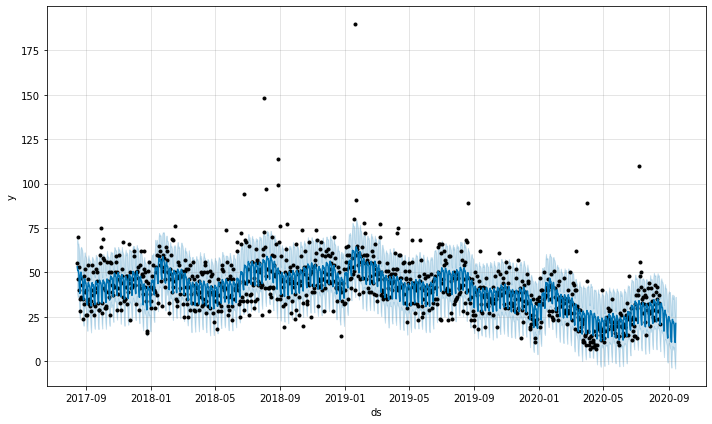

In [ ]:
fig1 = m.plot(forecast)

#Explore Yearly, Weekly & Monthly Trends

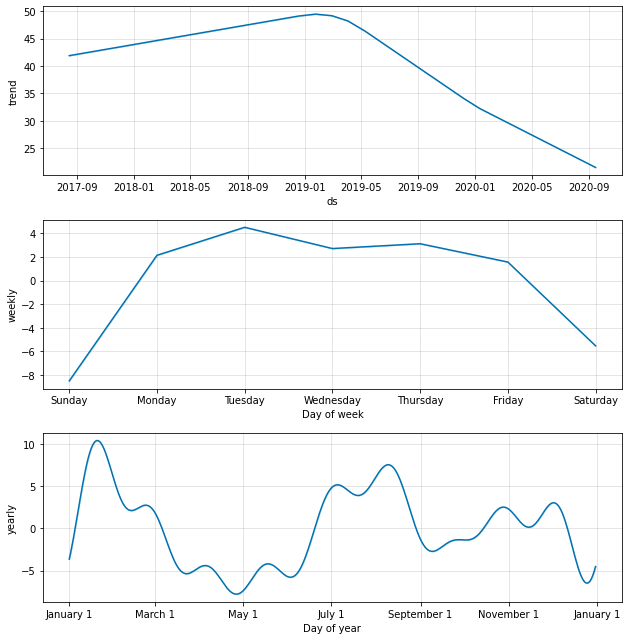

In [ ]:
fig2 = m.plot_components(forecast)

#[Optional] Pick a forecast date in the past to evaluate how well your actual data did vs. your model's prediction:

In [ ]:
forecast_date = '02-01-2020'


#Remove data that occured after start date

In [ ]:
mask = (df['ds'] < forecast_date)
df2 = df.loc[mask]
df2.head()

,ds,y
0,2017-08-15,55
1,2017-08-16,70
2,2017-08-17,46
3,2017-08-18,53
4,2017-08-19,40


#Make & Fit Model + Forecast data points

In [ ]:

# Make model and fit it
m2 = Prophet()
m2.fit(df2)

# Make a future data frame
future = m2.make_future_dataframe(periods=90)
future.tail()

# Predict the GA data over the future period
forecast = m2.predict(future)
forecast.tail()
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
985,2020-04-26,23.582346,-7.569349,22.291968,23.206037,24.025027,-16.404685,-16.404685,-16.404685,-9.486293,-9.486293,-9.486293,-6.918392,-6.918392,-6.918392,0.0,0.0,0.0,7.177661
986,2020-04-27,23.515198,4.687035,34.344119,23.126630,23.963861,-4.504653,-4.504653,-4.504653,2.681917,2.681917,2.681917,-7.186570,-7.186570,-7.186570,0.0,0.0,0.0,19.010545
987,2020-04-28,23.448051,6.547024,35.167894,23.053275,23.903153,-2.676596,-2.676596,-2.676596,4.717257,4.717257,4.717257,-7.393854,-7.393854,-7.393854,0.0,0.0,0.0,20.771455
988,2020-04-29,23.380904,3.657077,33.869964,22.976401,23.843173,-4.396229,-4.396229,-4.396229,3.142319,3.142319,3.142319,-7.538548,-7.538548,-7.538548,0.0,0.0,0.0,18.984674
989,2020-04-30,23.313756,4.987764,34.129372,22.902766,23.782129,-4.253893,-4.253893,-4.253893,3.366578,3.366578,3.366578,-7.620471,-7.620471,-7.620471,0.0,0.0,0.0,19.059863


#Plot the model's prediction

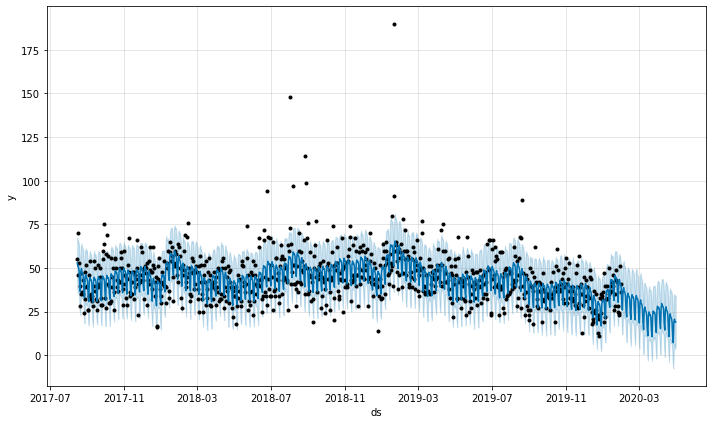

In [ ]:
# plot the forecast
fig2 = m2.plot(forecast)

In [ ]:
# Merge actuals with forecast
forecast_plot = forecast[['ds', 'yhat']]
df_inner = pd.merge(forecast_plot, df, on='ds', how='inner')
df_inner.tail()

,ds,yhat,y
985,2020-04-26,7.177661,15
986,2020-04-27,19.010545,12
987,2020-04-28,20.771455,14
988,2020-04-29,18.984674,40
989,2020-04-30,19.059863,17


In [ ]:

mask = (df_inner['ds'] > forecast_date)
df2_plot = df_inner.loc[mask]
df2_plot.tail()

,ds,yhat,y
985,2020-04-26,7.177661,15
986,2020-04-27,19.010545,12
987,2020-04-28,20.771455,14
988,2020-04-29,18.984674,40
989,2020-04-30,19.059863,17


#Evaluate actual results vs forecast to see how you did against the model's prediction

Prediction values are the light blue dashed line.

Actual values are the solid black line.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning:

Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.



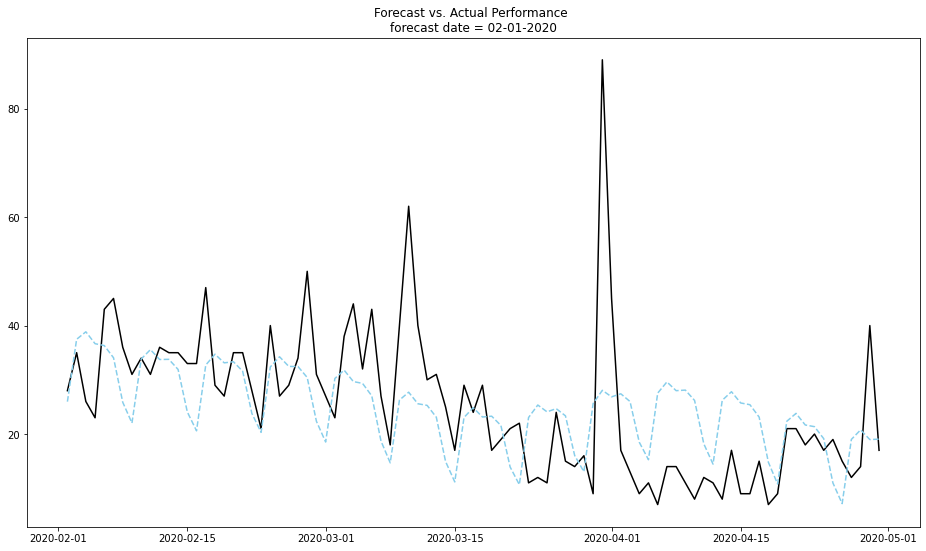

In [ ]:
# Plot actuals vs forecast
plt.figure(figsize=(16, 9))
plt.title(label='Forecast vs. Actual Performance \n' + 'forecast date = ' + forecast_date)
plt.plot('ds', 'y', data=df2_plot, color='black')
plt.plot('ds', 'yhat', data=df2_plot, color ='skyblue', linestyle='dashed')
plt.show()